# SENTIMENT ANALYSIS ON TEXT MESSAGES

# Step 1:
<t>Exploring the data to find out the number of occurances of positive, negative and neutral messages

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [114]:
df = pd.read_csv("/kaggle/input/chat-dataset-csv/chat_dataset.csv")
df.head()
#df currently has 584 rows, 2 columns

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


<Axes: title={'center': 'Number of occurances'}, xlabel='SENTIMENT'>

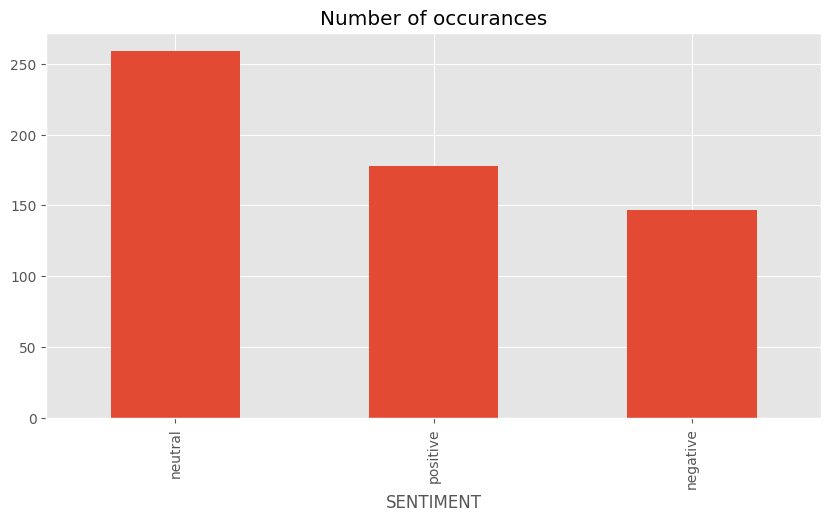

In [115]:
vals = df["sentiment"].value_counts()
vals.plot(kind="bar", title="Number of occurances", figsize=(10, 5), xlabel="SENTIMENT")

In [116]:
vals

sentiment
neutral     259
positive    178
negative    147
Name: count, dtype: int64

# Step 2:
Preprocessing of the data

In [117]:
import nltk
from tqdm.notebook import tqdm

In [118]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    if row["sentiment"]=="positive":
        row["sentiment"] = 1
    elif row["sentiment"]=="negative":
        row["sentiment"] = 0
    elif row["sentiment"]=="neutral":
        row["sentiment"] = 2
df

  0%|          | 0/584 [00:00<?, ?it/s]

,message,sentiment
0,I really enjoyed the movie,1
1,The food was terrible,0
2,I'm not sure how I feel about this,2
3,The service was excellent,1
4,I had a bad experience,0
...,...,...
579,I have to cancel my vacation plans because I c...,0
580,My computer crashed and I lost all my importan...,0
581,I got into a car accident and my car is totale...,0
582,I have a cold and can't stop coughing. it's re...,0


In [119]:
from nltk.corpus import stopwords  # words that are not particularly useful or meaningful
tokens = []
unwanted = stopwords.words("english")
for i, row in tqdm(df.iterrows(), total=len(df)):
    msg = row["message"].lower()
    token = nltk.word_tokenize(msg)
    for word in token:
        if not word.isalpha() or word in unwanted:
            token.remove(word)
    msg = " ".join(token)
    tokens.append(msg)
        
tokens

  0%|          | 0/584 [00:00<?, ?it/s]

['really enjoyed movie',
 'food terrible',
 "'m sure i feel this",
 'service excellent',
 'had bad experience',
 'is great product',
 'would recommend',
 'price a bit high',
 'weather perfect today',
 'traffic horrible',
 "'m feeling neutral this",
 'concert amazing',
 'customer service terrible',
 'book a masterpiece',
 'regret buying product',
 'view here breathtaking',
 'do know to think this',
 'internet speed slow',
 'museum fascinating',
 'noise level too high',
 'do have opinion this',
 'hotel room spacious clean',
 'service this restaurant awful',
 'software very',
 'quality the product poor',
 'do really care this',
 'beach crowded',
 'is excellent company work',
 'movie a waste time',
 "'m undecided this",
 'game a complete disaster',
 'scenery is beautiful',
 'speaker very engaging',
 'had great time',
 'product overpriced',
 "'m indifferent this",
 'performance outstanding',
 'car broke on highway',
 'do have strong feelings this',
 'food delicious',
 'service this hotel te

# Step 3:
Splitting into train and test data and using a count vectorizer on the two sets of data.

In [120]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer  #IMPLEMENTS BAG-OF-WORDS MODEL
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification

In [121]:
len(df)

584

In [122]:
def split(data, y, length, split_mark=0.7):
    # Splits the data into train and test sets in the ratio 70:30
    n = int(split_mark*length)
    X_train = data[:n]
    X_test = data[n:]
    y_train = y[:n]
    y_test = y[n:]
    return X_train, X_test, y_train, y_test

In [123]:
X_train, X_test, y_train, y_test = split(df["message"], df["sentiment"], len(df))

In [124]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(408,) (176,) (408,) (176,)


In [125]:
# Number of negatives, positives and neutrals in the training data
np.bincount(y_train)

array([ 82,  96, 230])

In [126]:
# Number of negatives, positives and neutrals in the test data
np.bincount(y_test)

array([65, 82, 29])

In [127]:
# Performing count vectorization on the data sets (Converting text documents into numerical data)
vect = CountVectorizer()

In [128]:
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [129]:
# Extracting feature names from the encoded (vectorized) data
feature_names = vect.get_feature_names_out()
print(f"No. of features: {len(feature_names)}")

No. of features: 356


In [130]:
print(f"First 20 features: {feature_names[:20]}")

First 20 features: ['about' 'above' 'all' 'alone' 'amazing' 'ambivalent' 'amenities' 'an'
 'and' 'anxious' 'anything' 'at' 'atmosphere' 'average' 'awful' 'back'
 'bad' 'beach' 'beautiful' 'below']


In [180]:
# Set of all words present in the dataset
vect.vocabulary_

{'really': 240,
 'enjoyed': 82,
 'the': 292,
 'movie': 183,
 'food': 106,
 'was': 333,
 'terrible': 289,
 'not': 196,
 'sure': 287,
 'how': 142,
 'feel': 99,
 'about': 0,
 'this': 296,
 'service': 262,
 'excellent': 90,
 'had': 125,
 'bad': 16,
 'experience': 95,
 'is': 156,
 'great': 123,
 'product': 232,
 'wouldn': 352,
 'recommend': 242,
 'price': 231,
 'bit': 24,
 'high': 136,
 'weather': 341,
 'perfect': 220,
 'today': 300,
 'traffic': 306,
 'horrible': 140,
 'feeling': 100,
 'neutral': 187,
 'concert': 45,
 'amazing': 4,
 'customer': 51,
 'book': 25,
 'masterpiece': 172,
 'regret': 244,
 'buying': 31,
 'view': 330,
 'from': 112,
 'here': 134,
 'breathtaking': 29,
 'don': 70,
 'know': 160,
 'what': 346,
 'to': 299,
 'think': 294,
 'internet': 154,
 'speed': 275,
 'slow': 265,
 'museum': 185,
 'fascinating': 98,
 'noise': 193,
 'level': 163,
 'too': 303,
 'have': 129,
 'an': 7,
 'opinion': 204,
 'on': 202,
 'hotel': 141,
 'room': 254,
 'spacious': 272,
 'and': 8,
 'clean': 37,
 'at

In [132]:
# Independent data to be passed to the model for training
print(X_train)

  (0, 240)	1
  (0, 82)	1
  (0, 292)	1
  (0, 183)	1
  (1, 292)	1
  (1, 106)	1
  (1, 333)	1
  (1, 289)	1
  (2, 196)	1
  (2, 287)	1
  (2, 142)	1
  (2, 99)	1
  (2, 0)	1
  (2, 296)	1
  (3, 292)	1
  (3, 333)	1
  (3, 262)	1
  (3, 90)	1
  (4, 125)	1
  (4, 16)	1
  (4, 95)	1
  (5, 296)	1
  (5, 156)	1
  (5, 123)	1
  (5, 232)	1
  :	:
  (404, 308)	1
  (404, 104)	1
  (405, 24)	1
  (405, 100)	1
  (405, 347)	1
  (405, 186)	1
  (405, 27)	1
  (405, 255)	1
  (406, 196)	1
  (406, 287)	1
  (406, 346)	1
  (406, 299)	1
  (406, 297)	1
  (406, 347)	1
  (406, 186)	1
  (406, 68)	1
  (406, 273)	1
  (407, 299)	1
  (407, 186)	1
  (407, 158)	1
  (407, 1)	1
  (407, 308)	1
  (407, 159)	1
  (407, 130)	1
  (407, 337)	1


In [133]:
# Dependent data to be passed to the model for training
print(y_train)

0      1
1      0
2      2
3      1
4      0
      ..
403    2
404    2
405    2
406    2
407    2
Name: sentiment, Length: 408, dtype: object


In [134]:
# Independent data with which the trained model will be tested
print(X_test)

  (0, 24)	1
  (0, 100)	1
  (0, 252)	1
  (0, 300)	1
  (1, 107)	1
  (1, 144)	1
  (1, 196)	1
  (1, 287)	1
  (1, 291)	1
  (1, 323)	1
  (2, 8)	1
  (2, 108)	1
  (2, 158)	1
  (2, 159)	1
  (2, 228)	1
  (2, 278)	1
  (2, 299)	1
  (2, 308)	1
  (3, 0)	1
  (3, 24)	1
  (3, 100)	1
  (3, 292)	1
  (3, 313)	1
  (4, 68)	1
  (4, 186)	1
  :	:
  (171, 186)	1
  (171, 297)	1
  (171, 299)	1
  (171, 327)	1
  (171, 350)	1
  (172, 2)	1
  (172, 8)	1
  (172, 167)	1
  (172, 186)	2
  (173, 8)	1
  (173, 34)	2
  (173, 156)	1
  (173, 186)	1
  (174, 8)	1
  (174, 33)	1
  (174, 129)	1
  (174, 157)	1
  (174, 240)	1
  (174, 299)	1
  (175, 99)	1
  (175, 156)	1
  (175, 158)	1
  (175, 186)	1
  (175, 211)	1
  (175, 266)	1


In [135]:
# Dependent data with which the trained model will be tested
print(y_test)

408    2
409    2
410    2
411    2
412    2
      ..
579    0
580    0
581    0
582    0
583    0
Name: sentiment, Length: 176, dtype: object


In [136]:
# The y_train and y_test were of object type but are required by subsequent methods to be integers. So type casting was done.
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Step 4:
To train different models with the X_train and y_train data sets and test it on the X_test and y_test 

In [137]:
# To improve the accuracy of certain models used, the data was scaled to fit better. 
# Scaling involves transforming numerical features of different scales into a common scale.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean = False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
# Cross validation score to help in assessing the model's performance
scores = cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv=5)
print(np.mean(scores)) 

0.8235772357723578


In [181]:
# Logistic Regression Model 
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_train = logreg.score(X_train_scaled, y_train)
logreg_test = logreg.score(X_test_scaled, y_test)
print(f"Training set: {logreg_train}")
print(f"Test set: {logreg_test}")

Training set: 0.9975490196078431
Test set: 0.32954545454545453


In [182]:
pred_logreg = logreg.predict(X_test_scaled)
logreg_confusion = confusion_matrix(y_test, pred_logreg)
print(logreg_confusion)

[[ 3  2 60]
 [ 7 28 47]
 [ 1  1 27]]


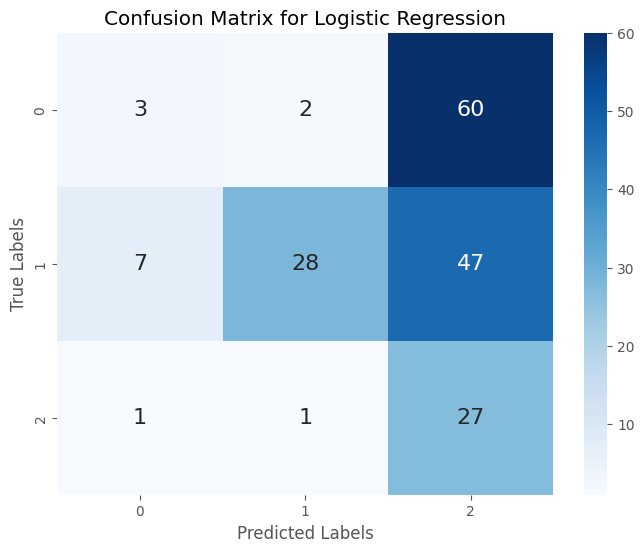

In [189]:
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [183]:
# Multinomial Naive-Bayes 
nb = MultinomialNB()
nb.fit(X_train_scaled, y_train)
nb_train = nb.score(X_train_scaled, y_train)
nb_test = nb.score(X_test_scaled, y_test)
print(f"Training set: {nb_train}")
print(f"Test set: {nb_test}")

Training set: 0.9509803921568627
Test set: 0.48295454545454547


In [184]:
pred_nb = nb.predict(X_test_scaled)
nb_confusion = confusion_matrix(y_test, pred_nb)
print(nb_confusion)

[[12  8 45]
 [ 6 49 27]
 [ 3  2 24]]


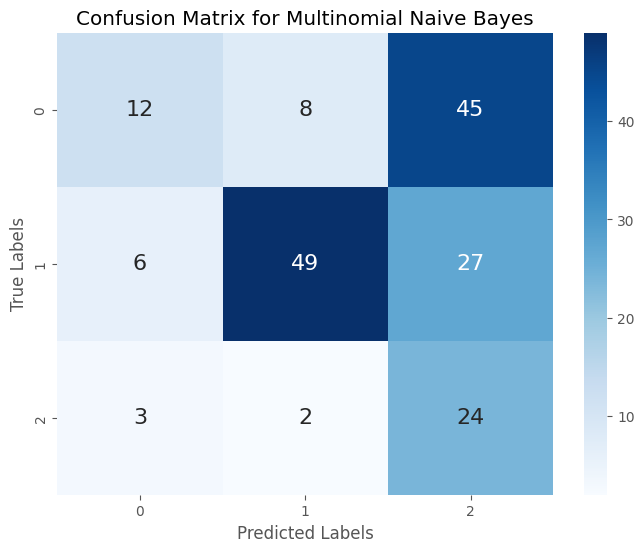

In [190]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [187]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_train = rf.score(X_train_scaled, y_train)
rf_test = rf.score(X_test_scaled, y_test)
print(f"Training set: {rf_train}")
print(f"Test set: {rf_test}")

Training set: 1.0
Test set: 0.2556818181818182


In [188]:
pred_rf = rf.predict(X_test_scaled)
rf_confusion = confusion_matrix(y_test, pred_rf)
print(rf_confusion)

[[ 1  1 63]
 [ 0 16 66]
 [ 0  1 28]]


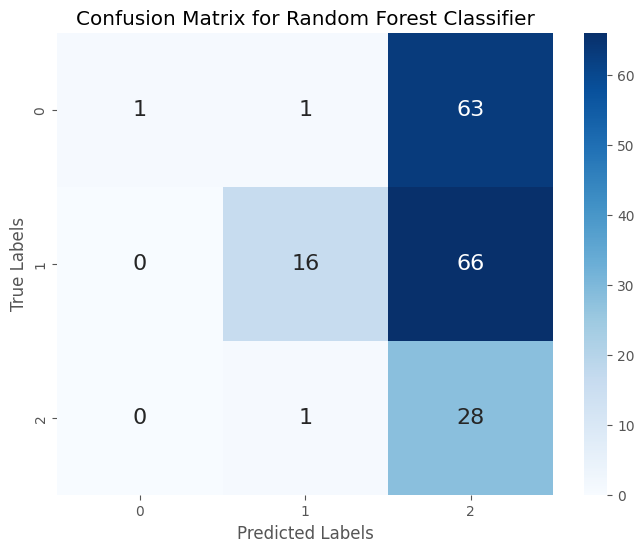

In [191]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional
Using One Hot Encoding to improve accuracy

In [90]:
df["sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [91]:
df["sentiment"].value_counts()

sentiment
neutral     259
positive    178
negative    147
Name: count, dtype: int64

In [92]:
df['sentiment'] = df['sentiment'].astype('category') 

In [93]:
df['sen_new'] = df['sentiment'].cat.codes 

In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [95]:
enc_data = enc.fit_transform(df[['sen_new']]).toarray()

In [96]:
new_df = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['sen_new']))

In [97]:
df1 = df.join(new_df)

In [98]:
df1

,message,sentiment,sen_new,sen_new_0,sen_new_1,sen_new_2
0,I really enjoyed the movie,positive,2,0.0,0.0,1.0
1,The food was terrible,negative,0,1.0,0.0,0.0
2,I'm not sure how I feel about this,neutral,1,0.0,1.0,0.0
3,The service was excellent,positive,2,0.0,0.0,1.0
4,I had a bad experience,negative,0,1.0,0.0,0.0
...,...,...,...,...,...,...
579,I have to cancel my vacation plans because I c...,negative,0,1.0,0.0,0.0
580,My computer crashed and I lost all my importan...,negative,0,1.0,0.0,0.0
581,I got into a car accident and my car is totale...,negative,0,1.0,0.0,0.0
582,I have a cold and can't stop coughing. it's re...,negative,0,1.0,0.0,0.0


The new dataframe can be split and passed to the models for increased accuracy

In [153]:
y = df1[["sen_new_0", "sen_new_1", "sen_new_2"]]

In [155]:
X_train1, X_test1, y_train1, y_test1 = split(df1["message"], y, len(df1))

In [156]:
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(408,) (176,) (408, 3) (176, 3)


In [167]:
print(X_train1)

  (0, 240)	1
  (0, 82)	1
  (0, 292)	1
  (0, 183)	1
  (1, 292)	1
  (1, 106)	1
  (1, 333)	1
  (1, 289)	1
  (2, 196)	1
  (2, 287)	1
  (2, 142)	1
  (2, 99)	1
  (2, 0)	1
  (2, 296)	1
  (3, 292)	1
  (3, 333)	1
  (3, 262)	1
  (3, 90)	1
  (4, 125)	1
  (4, 16)	1
  (4, 95)	1
  (5, 296)	1
  (5, 156)	1
  (5, 123)	1
  (5, 232)	1
  :	:
  (404, 308)	1
  (404, 104)	1
  (405, 24)	1
  (405, 100)	1
  (405, 347)	1
  (405, 186)	1
  (405, 27)	1
  (405, 255)	1
  (406, 196)	1
  (406, 287)	1
  (406, 346)	1
  (406, 299)	1
  (406, 297)	1
  (406, 347)	1
  (406, 186)	1
  (406, 68)	1
  (406, 273)	1
  (407, 299)	1
  (407, 186)	1
  (407, 158)	1
  (407, 1)	1
  (407, 308)	1
  (407, 159)	1
  (407, 130)	1
  (407, 337)	1


In [168]:
print(y_train1)

     sen_new_0  sen_new_1  sen_new_2
0          0.0        0.0        1.0
1          1.0        0.0        0.0
2          0.0        1.0        0.0
3          0.0        0.0        1.0
4          1.0        0.0        0.0
..         ...        ...        ...
403        0.0        1.0        0.0
404        0.0        1.0        0.0
405        0.0        1.0        0.0
406        0.0        1.0        0.0
407        0.0        1.0        0.0

[408 rows x 3 columns]


In [169]:
print(X_test1)

  (0, 24)	1
  (0, 100)	1
  (0, 252)	1
  (0, 300)	1
  (1, 107)	1
  (1, 144)	1
  (1, 196)	1
  (1, 287)	1
  (1, 291)	1
  (1, 323)	1
  (2, 8)	1
  (2, 108)	1
  (2, 158)	1
  (2, 159)	1
  (2, 228)	1
  (2, 278)	1
  (2, 299)	1
  (2, 308)	1
  (3, 0)	1
  (3, 24)	1
  (3, 100)	1
  (3, 292)	1
  (3, 313)	1
  (4, 68)	1
  (4, 186)	1
  :	:
  (171, 186)	1
  (171, 297)	1
  (171, 299)	1
  (171, 327)	1
  (171, 350)	1
  (172, 2)	1
  (172, 8)	1
  (172, 167)	1
  (172, 186)	2
  (173, 8)	1
  (173, 34)	2
  (173, 156)	1
  (173, 186)	1
  (174, 8)	1
  (174, 33)	1
  (174, 129)	1
  (174, 157)	1
  (174, 240)	1
  (174, 299)	1
  (175, 99)	1
  (175, 156)	1
  (175, 158)	1
  (175, 186)	1
  (175, 211)	1
  (175, 266)	1


In [170]:
print(y_test1)

     sen_new_0  sen_new_1  sen_new_2
408        0.0        1.0        0.0
409        0.0        1.0        0.0
410        0.0        1.0        0.0
411        0.0        1.0        0.0
412        0.0        1.0        0.0
..         ...        ...        ...
579        1.0        0.0        0.0
580        1.0        0.0        0.0
581        1.0        0.0        0.0
582        1.0        0.0        0.0
583        1.0        0.0        0.0

[176 rows x 3 columns]
